In [84]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [73]:
data = pd.read_csv('salary.csv',sep=',')
data[data.duplicated()]
data.Gender.replace({'Male':1,'Female':0},inplace=True)
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 6682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5148 non-null   float64
 1   Gender               5148 non-null   int64  
 2   Education Level      5148 non-null   int64  
 3   Job Title            5148 non-null   object 
 4   Years of Experience  5148 non-null   float64
 5   Salary               5148 non-null   float64
 6   Country              5148 non-null   object 
 7   Race                 5148 non-null   object 
 8   Senior               5148 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 402.2+ KB


In [74]:
#norm_df = preprocessing.normalize(data[["Salary",'Age','Years of Experience']])
scalr = preprocessing.MinMaxScaler(feature_range=(0, 4))
data[["Salary",'Years of Experience']]=scalr.fit_transform(data[["Salary",'Years of Experience']])
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,1,1,Software Engineer,0.588235,1.436411,UK,White,0
1,28.0,0,2,Data Analyst,0.352941,1.035850,USA,Hispanic,0
2,45.0,1,3,Manager,1.764706,2.397757,Canada,White,1
3,36.0,0,1,Sales Associate,0.823529,0.955738,USA,Hispanic,0
4,52.0,1,2,Director,2.352941,3.198878,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6678,37.0,1,1,Sales Representative,0.705882,1.196075,Canada,Asian,0
6679,49.0,0,3,Director of Marketing,2.352941,3.198878,UK,Mixed,0
6680,32.0,1,0,Sales Associate,0.352941,0.795514,Australia,Australian,0
6681,30.0,0,1,Financial Manager,0.470588,0.875626,China,Chinese,0


In [75]:
df=data[["Salary",'Years of Experience','Education Level']]
models = []
score1 = []
score2 = []
for i in range(2,24):
    model = KMeans(n_clusters=i,random_state=123, init = 'k-means++').fit(df)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(df,model.labels_))

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

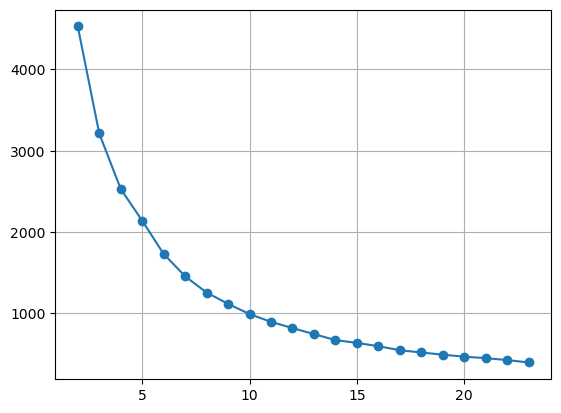

In [76]:
plt.grid()
plt.plot(np.arange(2,24),score1,marker='o')
plt.show()

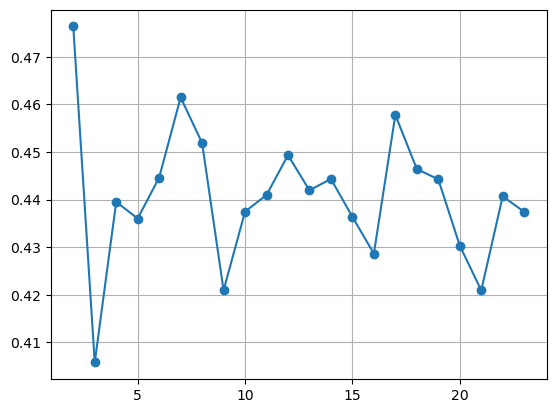

In [77]:
plt.grid()
plt.plot(np.arange(2,24),score2,marker='o')
plt.show()

In [78]:
model1 = KMeans(n_clusters=7,random_state=123, init = 'k-means++')
model1.fit(df)
model1.cluster_centers_

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 2.19726778e+00,  9.51996565e-01,  9.97080292e-01],
       [ 2.89212358e+00,  2.58336234e+00,  1.78994083e+00],
       [ 2.75357885e+00,  1.70458668e+00,  3.00000000e+00],
       [ 5.34261771e-01,  1.61047346e-01, -5.10702591e-15],
       [ 2.31607233e+00,  1.23017903e+00,  2.00000000e+00],
       [ 1.05335398e+00,  3.93872381e-01,  9.98632946e-01],
       [ 1.37624916e+00,  5.97734746e-01,  2.18944099e+00]])

In [81]:
df['Claster'] = model1.labels_
df['Claster'].value_counts()
fig = go.Figure(data=[go.Scatter3d(x=df["Salary"],y=df['Years of Experience'],z=df['Education Level'],mode='markers',marker_color=df['Claster'], marker_size=4)])
fig.show()

C:\Users\79537\AppData\Local\Temp\ipykernel_7180\1249977147.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5    1466
2     908
4     782
0     682
6     644
1     338
3     328
Name: Claster, dtype: int64

In [83]:
model2 = AgglomerativeClustering(7, compute_distances=True)
clastering=model2.fit(df)
df['Claster2'] = clastering.labels_
fig = go.Figure(data=[go.Scatter3d(x=df["Salary"],y=df['Years of Experience'],z=df['Education Level'],mode='markers',marker_color=df['Claster2'], marker_size=4)])
fig.show()

C:\Users\79537\AppData\Local\Temp\ipykernel_7180\922268201.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
model3 = DBSCAN(eps=3, min_samples=5).fit(df)
df['Claster3'] = model3.labels_
fig = go.Figure(data=[go.Scatter3d(x=df["Salary"],y=df['Years of Experience'],z=df['Education Level'],mode='markers',marker_color=df['Claster3'], marker_size=4)])
fig.show()

C:\Users\79537\AppData\Local\Temp\ipykernel_7180\495632115.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

